In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire data

In [3]:
import pandas as pd


In [4]:
train_df = pd.read_csv("./titanic/train.csv")
test_df = pd.read_csv("./titanic/test.csv")
combine = [train_df, test_df]

In [5]:
# Mr 성씨를 가진 사람의 평균나이 -> 29세 , 각 클래스별 평균나이 +평균나이
train_df[train_df.Name.str.contains('Miss')]['Age'].mean()

21.773972602739725

In [6]:
# Pclass 3 -> 25세
train_df[train_df.Pclass ==3]['Age'].mean()

25.14061971830986

In [7]:
# 자손이 없는 사람의 평균나이 -> 31세
train_df[train_df.SibSp ==0]['Age'].mean()

31.39755838641189

In [8]:
train_df[train_df.Parch ==0]['Age'].mean()

32.17850287907869

In [9]:
train_df[train_df.Embarked =='S']['Age'].mean()

29.44539711191336

In [10]:
train_df.groupby(['Survived','Pclass'],as_index=False).count()

,Survived,Pclass,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,80,80,80,64,80,80,80,80,59,80
1,0,2,97,97,97,90,97,97,97,97,3,97
2,0,3,372,372,372,270,372,372,372,372,6,372
3,1,1,136,136,136,122,136,136,136,136,117,134
4,1,2,87,87,87,83,87,87,87,87,13,87
5,1,3,119,119,119,85,119,119,119,119,6,119


In [11]:
train_df[train_df.Survived ==0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [12]:
train_df[train_df.Survived ==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [13]:
# 연속형 변수는 age ? 이산 변수뿐
# Survived 와 Fare와의 상관관계

train_df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
for row in train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']].itertuples():
    print(row)
    break

Pandas(Index=(1, 0), PassengerId=137)


In [15]:
for row in train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']].iterrows():
    print(row[1].values[0])

137
71
5
3
120
55
8
1
351
83
15
12
18
5
7


In [16]:
grp_df = train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']]

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
2 3
2 4
2 5


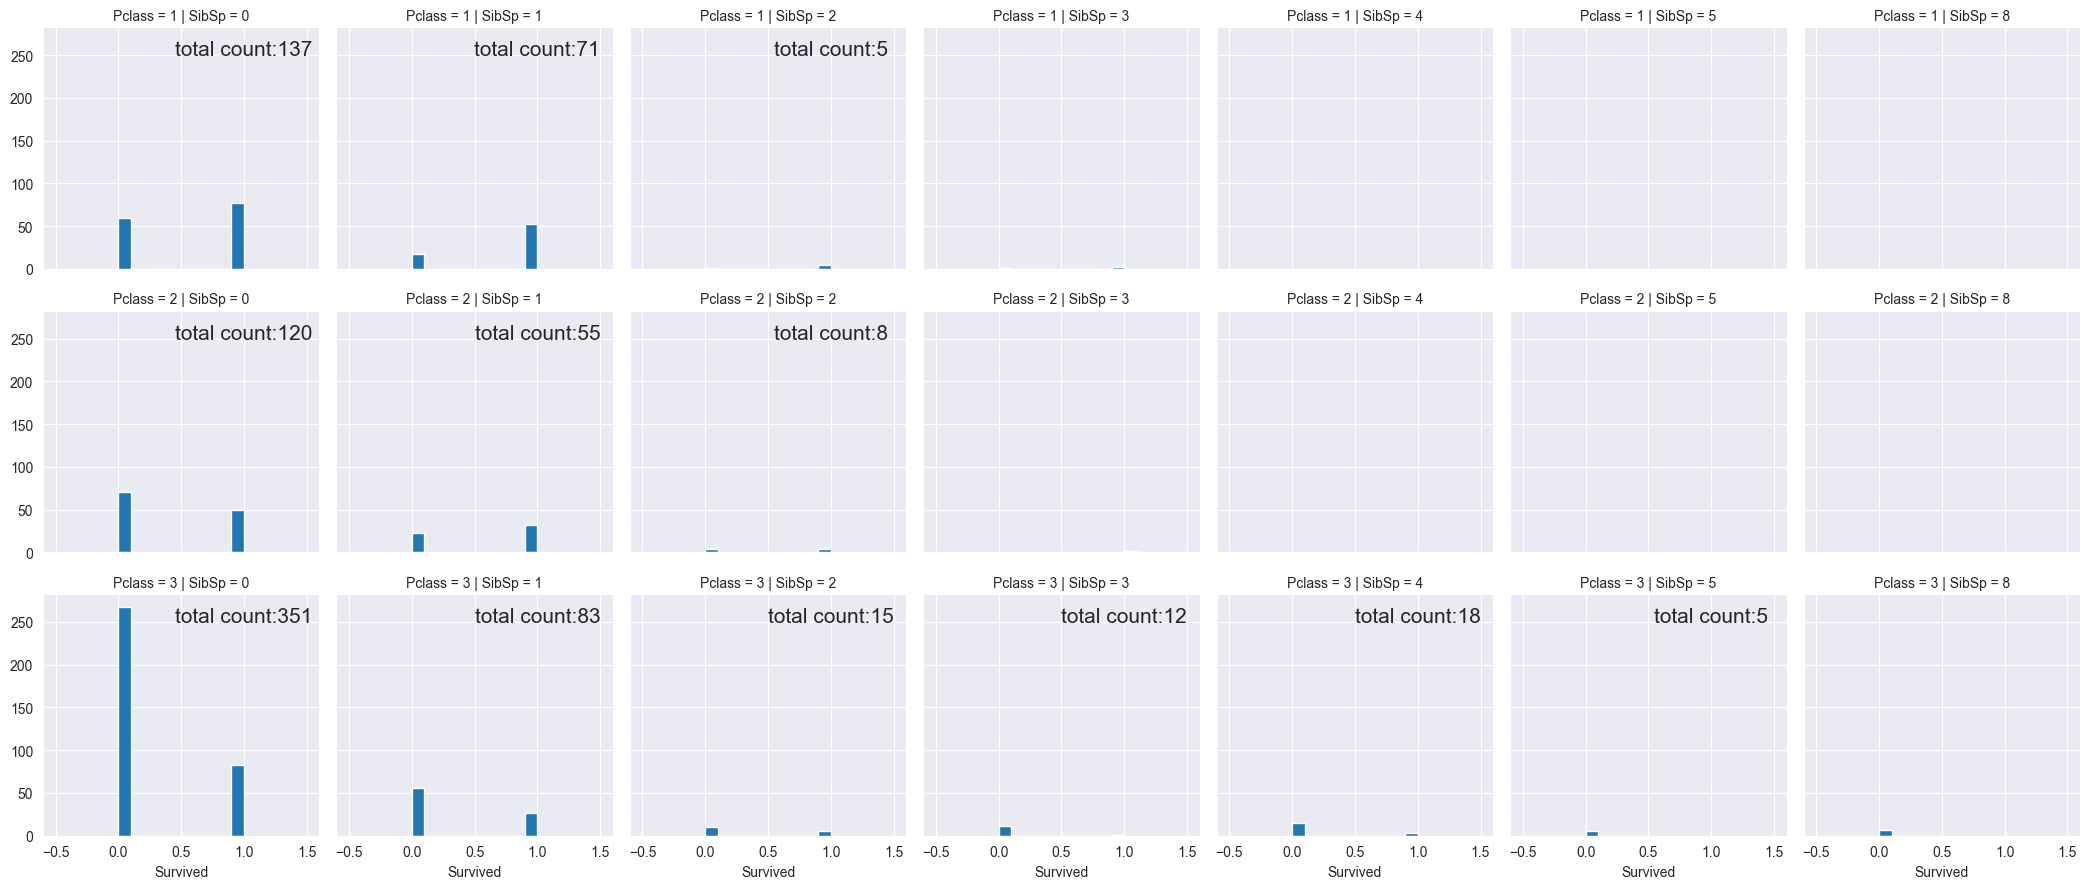

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
grid = sns.FacetGrid(train_df, row='Pclass',col='SibSp')
grid.map(plt.hist, 'Survived')
# grid.axes[0][0].text(2022)
for idx in range(grp_df.idxmax()[0][0]):
    j = 0
    j_max = len(grp_df.loc[(idx+1,)])-1
    for ax in grid.axes[idx]:
        # ax.set_xlim(0.0)
        #print(idx)
        #grp_df.loc[(1,0)].values[0]
        # j_max = len(grp_df.loc[(idx+1,)])

        if j == j_max:
            continue
        print(idx,j)
        val = grp_df.loc[(idx+1,j )].values[0]
        ax.text(1,250,f'total count:{val}',horizontalalignment='center',size=15)
        j+=1
        # j_max +=1
# 순서가 아니고 다르게 했어야하나
 #

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


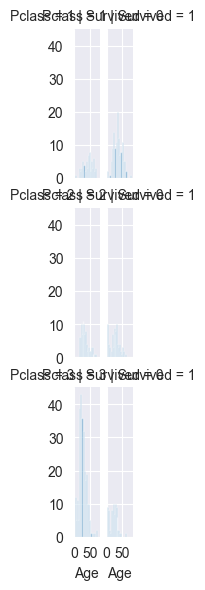

In [18]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=.16)
grid.map(plt.hist, 'Age', alpha=.5,bins=20)
grid.add_legend()

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(<seaborn.axisgrid.FacetGrid at 0x1e368dc8df0>,)

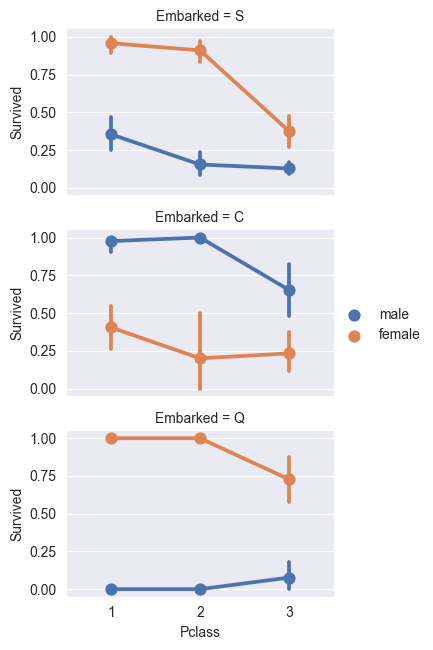

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2 , aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend(),

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


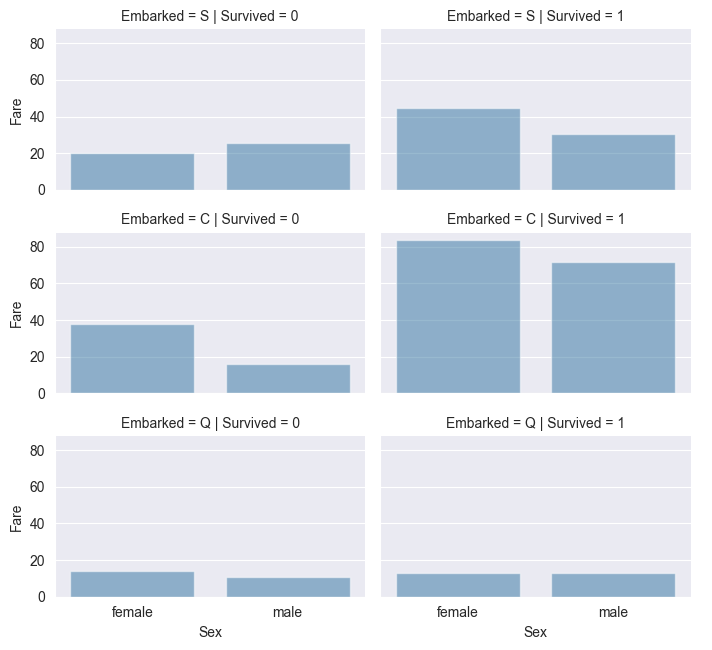

In [20]:
grid = sns.FacetGrid(train_df, row='Embarked' ,col ='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex' ,'Fare', alpha=.5 , ci=None)
grid.add_legend()

In [21]:
print("Before", train_df.shape, test_df.shape , combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [22]:
train_df = train_df.drop(['Ticket','Cabin'],axis=1)

In [23]:
test_df = test_df.drop(['Ticket','Cabin'],axis=1)

In [24]:
combine = [train_df, test_df]


In [25]:
grp_df

PassengerId
Pclass SibSp             
1      0              137
       1               71
       2                5
       3                3
2      0              120
       1               55
       2                8
       3                1
3      0              351
       1               83
       2               15
       3               12
       4               18
       5                5
       8                7

In [26]:
groupKey = ['Pclass','SibSp']

In [27]:
grp_df.sort_index()

PassengerId
Pclass SibSp             
1      0              137
       1               71
       2                5
       3                3
2      0              120
       1               55
       2                8
       3                1
3      0              351
       1               83
       2               15
       3               12
       4               18
       5                5
       8                7

In [29]:
grp_df

PassengerId
Pclass SibSp             
1      0              137
       1               71
       2                5
       3                3
2      0              120
       1               55
       2                8
       3                1
3      0              351
       1               83
       2               15
       3               12
       4               18
       5                5
       8                7

In [30]:
groupKey

['Pclass', 'SibSp']

In [31]:
grp_df[grp_df.index.Pclass ==1]

AttributeError: 'MultiIndex' object has no attribute 'Pclass'

In [32]:
for row in train_df.groupby(['Pclass','SibSp']).count()[['PassengerId']].iterrows():
    print(row)

((1, 0), PassengerId    137
Name: (1, 0), dtype: int64)
((1, 1), PassengerId    71
Name: (1, 1), dtype: int64)
((1, 2), PassengerId    5
Name: (1, 2), dtype: int64)
((1, 3), PassengerId    3
Name: (1, 3), dtype: int64)
((2, 0), PassengerId    120
Name: (2, 0), dtype: int64)
((2, 1), PassengerId    55
Name: (2, 1), dtype: int64)
((2, 2), PassengerId    8
Name: (2, 2), dtype: int64)
((2, 3), PassengerId    1
Name: (2, 3), dtype: int64)
((3, 0), PassengerId    351
Name: (3, 0), dtype: int64)
((3, 1), PassengerId    83
Name: (3, 1), dtype: int64)
((3, 2), PassengerId    15
Name: (3, 2), dtype: int64)
((3, 3), PassengerId    12
Name: (3, 3), dtype: int64)
((3, 4), PassengerId    18
Name: (3, 4), dtype: int64)
((3, 5), PassengerId    5
Name: (3, 5), dtype: int64)
((3, 8), PassengerId    7
Name: (3, 8), dtype: int64)


In [33]:
ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

NameError: name 'v' is not defined

In [35]:
fig,ax = plt.subplots((3,2),figsize=(15,15))
# 형제 배우자가 없는 pclass 3은 생존율이 현저히 낮다
# 근데 pclass가 높으면 없더라도 생존율은 높다
# 각 count를 통해 비율 살피기

ValueError: Number of rows must be a positive integer, not (3, 2)

<Figure size 1500x1500 with 0 Axes>

In [36]:
train_df.groupby(['Pclass','SibSp']).count()['PassengerId']

Pclass  SibSp
1       0        137
        1         71
        2          5
        3          3
2       0        120
        1         55
        2          8
        3          1
3       0        351
        1         83
        2         15
        3         12
        4         18
        5          5
        8          7
Name: PassengerId, dtype: int64

In [37]:
grid.axes[0][0]

<AxesSubplot:title={'center':'Embarked = S | Survived = 0'}, ylabel='Fare'>

In [38]:
plt.show()

In [39]:
fig, axs = plt.subplots(grid)

ValueError: Number of rows must be a positive integer, not <seaborn.axisgrid.FacetGrid object at 0x000001E368F2D460>

<Figure size 640x480 with 0 Axes>

In [40]:
grid.axes[0][0]

<AxesSubplot:title={'center':'Embarked = S | Survived = 0'}, ylabel='Fare'>

In [41]:
# dataframe dtypes 가 float이 되기 때문에 1의 str length도 3이 나온
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
import numpy as np
len(str(np.float(1)))
len(str(1))
len(str(2.12))
df.applymap(lambda x: len(str(x)))

C:\Users\DATA\AppData\Local\Temp\ipykernel_11208\1249344773.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  len(str(np.float(1)))


,0,1
0,3,4
1,5,5


In [42]:
df.dtypes

# row의 각 컬럼을 받아서 컬럼별로 특징 보기

0    float64
1    float64
dtype: object

In [43]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [44]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [45]:
train_df[train_df.Pclass]


KeyError: "None of [Int64Index([3, 1, 3, 1, 3, 3, 1, 3, 3, 2,\n            ...\n            3, 3, 2, 3, 3, 2, 1, 3, 1, 3],\n           dtype='int64', length=891)] are in the [columns]"

In [46]:
train_df['Fare'].mean()

32.204207968574636

In [47]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Fare' 'Embarked']


In [48]:
# 체크해야 할 사항 automl 시
# which features are mixed data types?
# which features may contain errors or typos?


# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [49]:
train_df.tail()
# which features contain blank, null or empty values?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


In [50]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name      

In [51]:

# what is the distribution of numertical feature valeus across the samples?

In [52]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
train_df.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Braund, Mr. Owen Harris",male,S
freq,1,577,644


In [54]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [55]:

train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)



,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [57]:
# as_index = > groupby columns을 index로 사용?
train_df[["Parch",'Survived']].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


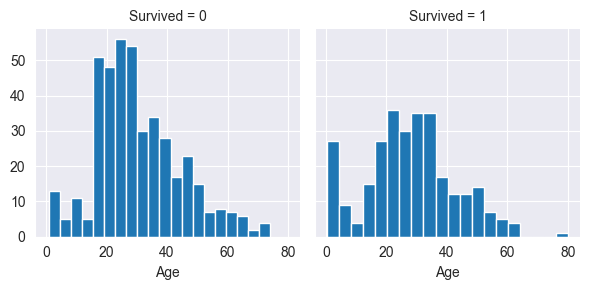

In [58]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age',bins=20)

In [59]:
# FacetGrid method 는
# axes의 가로 길이가 col의  unique 길이가 되고
# axes의 세로 길이가 row의 unique value 길이가 되서 조합하여 나오는 결과
# 를 hist를 넣으면,'Age'에 대한 row col 조합의 histogram을 나타낸다

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


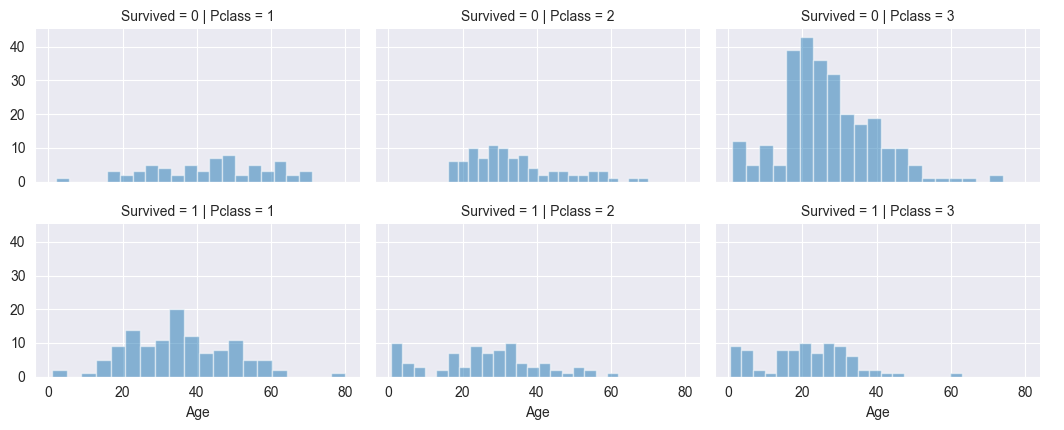

In [60]:
# grid = sns.FacetGrid(train_df, col='Pclass',hue='Survived')
# facetgrid 의 row col 은 조합으로 활용한다
#
grid = sns.FacetGrid(train_df, col='Pclass',row='Survived',size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5,bins=20)
grid.add_legend();

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


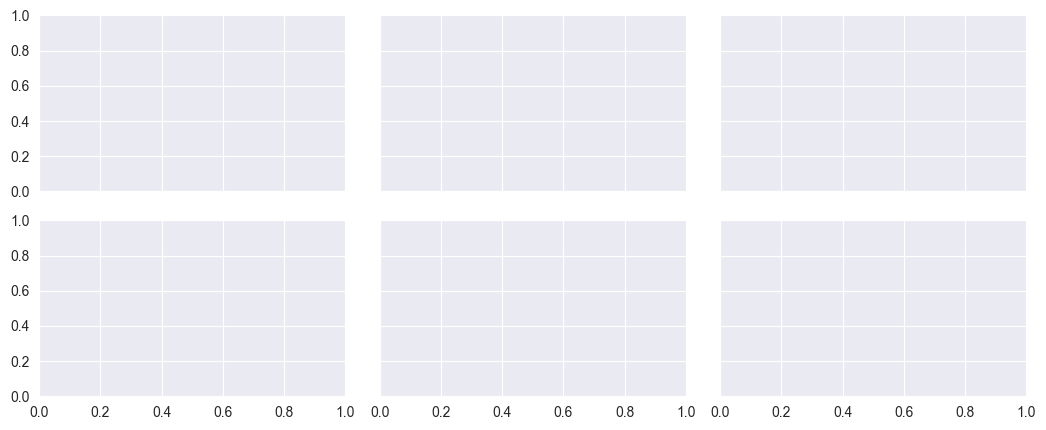

In [61]:
sns.FacetGrid(train_df, col='Pclass',row='Survived',size=2.2,aspect=1.6)

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


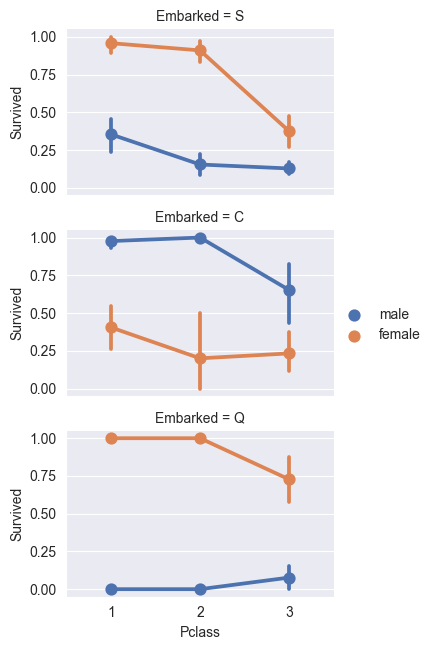

In [62]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2,aspect=1.6)
# pointplot의 argument pclass = col , survived = col , sex = hue
grid.map(sns.pointplot, 'Pclass','Survived','Sex', palette='deep')
grid.add_legend()

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


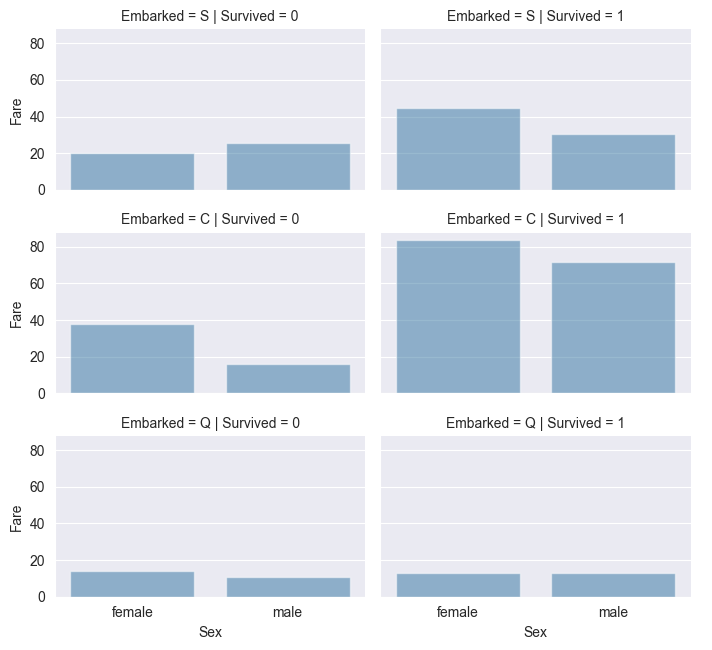

In [63]:
#
grid = sns.FacetGrid(train_df, row='Embarked' , col='Survived', size=2.2,aspect=1.6)
grid.map(sns.barplot , 'Sex' , 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [64]:
print("Before" , train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 10) (418, 9) (891, 10) (418, 9)


In [66]:
# correcting by dropping features

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine =[train_df, test_df ]


KeyError: "['Ticket', 'Cabin'] not found in axis"

In [67]:
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [68]:
# creating new feature

In [69]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [70]:
# 빈도표 생성
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [71]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady','Countess','Capt','Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Rare')

In [72]:
dataset[dataset['Title'] == 'Rare']['Title']

131    Rare
149    Rare
164    Rare
202    Rare
293    Rare
414    Rare
Name: Title, dtype: object

In [73]:
dataset['Title'] = dataset['Title'].replace('Mlle','Miss')


In [74]:
dataset['Title'] = dataset['Title'].replace('Ms',',Miss')

In [75]:
dataset['Title'] = dataset['Title'].replace("Mme","Mrs")

In [76]:
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mlle,1.000000
3,Mme,1.000000
4,Mr,0.156673
5,Mrs,0.792000
6,Ms,1.000000
7,Rare,0.347826


In [77]:
title_mapping ={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

In [78]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

In [79]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [80]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(["Name"],axis=1)
combine = [train_df, test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [81]:

# cConverting categorical feature

for dataset in combine:
    dataset["Sex"] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

In [82]:

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


c:\users\data\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


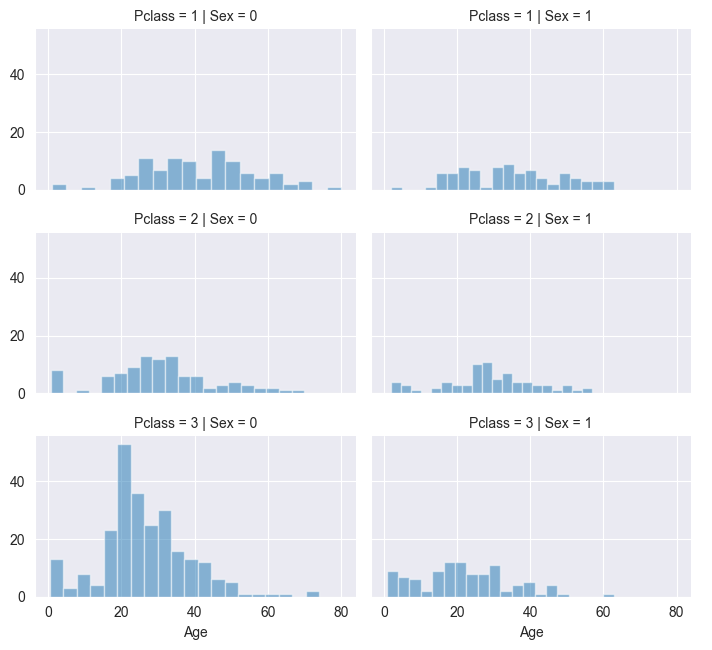

In [83]:
# grid = sns.FacetGrid(train_df, col="Pclass", hue="Gender")
grid = sns.FacetGrid(train_df, row="Pclass",col="Sex", size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [84]:

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [85]:
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [86]:
# 조합별로 중위값을 찾아서 나이를 추측하는 것이다

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset["Sex"] ==i) &\
                               (dataset['Pclass'] ==j+1)]['Age'].dropna()
            age_guess = guess_df.median()

            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5


    # 추측한 나이( 중위값을 null 값에 넣는다)
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex ==i) & (dataset.Pclass == j+1),\
                'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

In [87]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


In [88]:
# cut - 동일 길이로 cut
train_df['AgeBand'] = pd.cut(train_df['Age'],5 )
# as_index를 통해 reset_index를 하지않아도된다

In [89]:
train_df['AgeBand']

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: AgeBand, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [90]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1.0,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S,5.0,"(16.0, 32.0]"
887,1,1,1,19,0,0,30.0000,S,2.0,"(16.0, 32.0]"
888,0,3,1,21,1,2,23.4500,S,2.0,"(16.0, 32.0]"
889,1,1,0,26,0,0,30.0000,C,1.0,"(16.0, 32.0]"


In [91]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [92]:
#train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean()

In [93]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by='AgeBand',ascending=True)

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [94]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age']> 16) &(dataset['Age']<=32),'Age']= 1
    dataset.loc[(dataset['Age']> 32) &(dataset['Age'] <=48),'Age']=2
    dataset.loc[(dataset['Age']>48) &(dataset['Age']<=64),'Age']= 3
    dataset.loc[dataset['Age']>64,'Age']
train_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [95]:
train_df = train_df.drop(['AgeBand'],axis=1)
combine= [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1.0
1,1,1,1,2,1,0,71.2833,C,3.0
2,1,3,1,1,0,0,7.9250,S,2.0
3,1,1,1,2,1,0,53.1000,S,3.0
4,0,3,0,2,0,0,8.0500,S,1.0


In [96]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1

train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [97]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1

train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [98]:

train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1.0,0
1,1,1,1,2,71.2833,C,3.0,0
2,1,3,1,1,7.9250,S,2.0,1
3,1,1,1,2,53.1000,S,3.0,0
4,0,3,0,2,8.0500,S,1.0,1


In [99]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [100]:
train_df.loc[:, ['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [101]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [102]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [104]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [105]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1.0,0,3
1,1,1,1,2,71.2833,1,3.0,0,2
2,1,3,1,1,7.9250,0,2.0,1,3
3,1,1,1,2,53.1000,0,3.0,0,2
4,0,3,0,2,8.0500,0,1.0,1,6


In [106]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


In [107]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [112]:
# 값을 범위로 자른다
pd.qcut(train_df['Fare'],4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [114]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']  > 7.91) & (dataset['Fare'] <= 14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) &(dataset['Fare'] <=31),'Fare'] = 2
    dataset.loc[dataset['Fare']>31 , 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [115]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1.0,0,3
1,1,1,1,2,3,1,3.0,0,2
2,1,3,1,1,1,0,2.0,1,3
3,1,1,1,2,3,0,3.0,0,2
4,0,3,0,2,1,0,1.0,1,6


In [116]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3


In [118]:
X_train  = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop("PassengerId",axis=1).copy()
X_train.shape , Y_train.shape , X_test.shape

((891, 8), (891,), (418, 8))

In [119]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [120]:
Y_pred = logreg.predict(X_test)

In [121]:
acc_log = round(logreg.score(X_train,Y_train)  * 100, 2 )

In [122]:
acc_log

80.36

In [123]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by="Correlation",ascending=False)

,Feature,Correlation
1,Sex,2.222496
5,Title,0.383121
2,Age,0.288920
4,Embarked,0.263233
6,IsAlone,0.131543
3,Fare,-0.081629
7,Age*Class,-0.313030
0,Pclass,-0.750511


In [124]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train ) * 100, 2)
acc_svc


77.78

In [129]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred=  knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100,2)

In [130]:
acc_knn

76.88

In [131]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train) *100, 2)
acc_gaussian

71.6

In [132]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)  *100,2 )
acc_perceptron

59.37

In [133]:
# LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100,2)
acc_linear_svc

c:\users\data\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.01

In [134]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)* 100,2)
acc_sgd

77.67

In [103]:
# mode : 최빈

#.Embarked.dropna().mode()

SyntaxError: invalid syntax (742054281.py, line 3)

In [ ]:
train_df